# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [164]:
print(f" The first analysis I made, was that the durg Capomulin and Ramicane were the most effective drugs in reducing tumor size. Both of these two drugs had the lowest mean and median tumor size, and their variances were the smallest. This meant that there were less outliers and most of the data stay closed to the median. ")
print(f"I can infer that mice treated with Capomulin, that were heavier were more resistent to the drug effects and had a harder time reducing tumor size while mice that were smaller saw smaller tumor sizes.")
print(f"Gender does not seem to play a role in the effoct of the tumor size when using Capomulin.")

 The first analysis I made, was that the durg Capomulin had the best effect on reducing tumor size on the mice studied. Using {'whiskers': [<matplotlib.lines.Line2D object at 0x000001C9925B4210>, <matplotlib.lines.Line2D object at 0x000001C9925B4E90>, <matplotlib.lines.Line2D object at 0x000001C9925C83D0>, <matplotlib.lines.Line2D object at 0x000001C9925C1050>, <matplotlib.lines.Line2D object at 0x000001C99259C090>, <matplotlib.lines.Line2D object at 0x000001C99259CBD0>, <matplotlib.lines.Line2D object at 0x000001C9925A74D0>, <matplotlib.lines.Line2D object at 0x000001C9925A6F90>], 'caps': [<matplotlib.lines.Line2D object at 0x000001C9925C8C90>, <matplotlib.lines.Line2D object at 0x000001C9925C9BD0>, <matplotlib.lines.Line2D object at 0x000001C9925C2450>, <matplotlib.lines.Line2D object at 0x000001C9925C3210>, <matplotlib.lines.Line2D object at 0x000001C99259F790>, <matplotlib.lines.Line2D object at 0x000001C9925A3750>, <matplotlib.lines.Line2D object at 0x000001C9925A4710>, <matplotli

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_df = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")
# Display the data table for preview
mouse_data_df.head()


Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [9]:
#check for missing data
mouse_data_df.count()

Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
dtype: int64

In [10]:
# Checking the number of mice.
unique_mice = mouse_data_df["Mouse ID"].nunique()
unique_mice


249

In [29]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_id = mouse_data_df[mouse_data_df.duplicated(subset=['Mouse ID', 'Timepoint'])]["Mouse ID"].unique()
duplicate_id

array(['g989'], dtype=object)

In [30]:
# Optional: Get all the data for the duplicate mouse ID.
duplicated_mouse = mouse_data_df[mouse_data_df["Mouse ID"] == "g989"]

In [31]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_data = mouse_data_df[mouse_data_df["Mouse ID"].isin(duplicate_id) == False]
clean_study_data

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        b128          0           45.000000                 0    Capomulin   
1        f932          0           45.000000                 0     Ketapril   
2        g107          0           45.000000                 0     Ketapril   
3        a457          0           45.000000                 0     Ketapril   
4        c819          0           45.000000                 0     Ketapril   
...       ...        ...                 ...               ...          ...   
1888     r944         45           41.581521                 2    Capomulin   
1889     u364         45           31.023923                 3    Capomulin   
1890     p438         45           61.433892                 1     Ceftamin   
1891     x773         45           58.634971                 4      Placebo   
1892     b879         45           72.555239                 2     Stelasyn   

         Sex  Age_months  Weight (g)  
0     Female           9          22  
1       Male          15          29  
2     Female           2          29  
3     Female          11          30  
4       Male          21          25  
...      ...         ...         ...  
1888    Male          12          25  
1889    Male          18          17  
1890  Female          11          26  
1891  Female          21          30  
1892  Female           4          26  

[1880 rows x 8 columns]

In [36]:
# Checking the number of mice in the clean DataFrame.
clean_study_data["Mouse ID"].nunique()
clean_study_data.dtypes

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
dtype: object

## Summary Statistics

In [63]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
means = clean_study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = clean_study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = clean_study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
stdv = clean_study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = clean_study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_stats_study_df = pd.DataFrame({
    "MEAN": means,
    "MEDIAN": median,
    "VARIANCE": variance,
    "STDEV": stdv,
    "SEM": sem
    
})
summary_stats_study_df

MEAN     MEDIAN   VARIANCE     STDEV       SEM
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398

In [72]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = clean_study_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std", "sem"]})
summary_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, '# of Mice Tested per Drug Regimen')

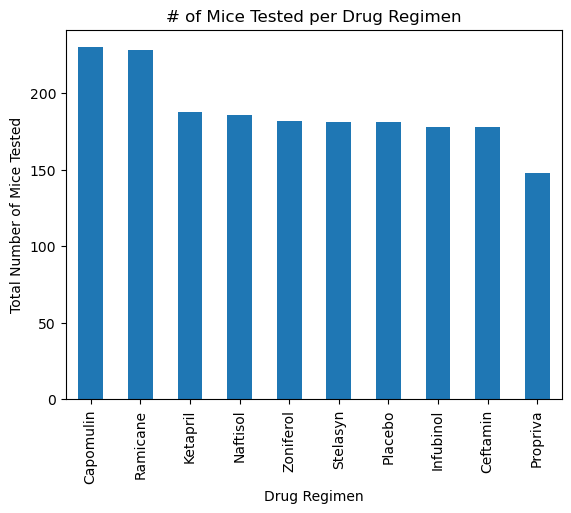

In [74]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
counts = clean_study_data["Drug Regimen"].value_counts()
counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Mice Tested")
plt.title("# of Mice Tested per Drug Regimen")

<function matplotlib.pyplot.show(close=None, block=None)>

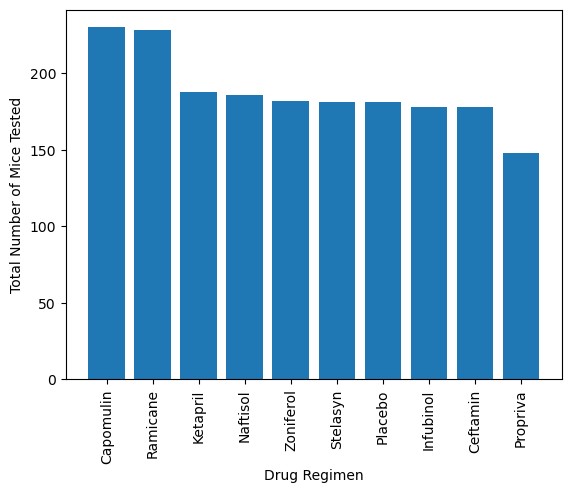

In [83]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.counts

counts = clean_study_data["Drug Regimen"].value_counts()
plt.bar(counts.index.values, counts.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Total Number of Mice Tested")
plt.show

Text(0, 0.5, 'SEX')

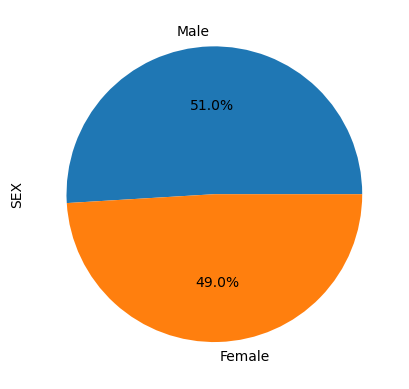

In [88]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
#this gets the values of the sex column
genders = clean_study_data.Sex
genders
#this sums up each different value(female and male)
gender_counts = clean_study_data.Sex.value_counts()
gender_counts
# Get the unique mice with their gender


# Make the pie chart
gender_counts.plot(kind="pie", autopct="%1.1f%%")
plt.ylabel("SEX")

<function matplotlib.pyplot.show(close=None, block=None)>

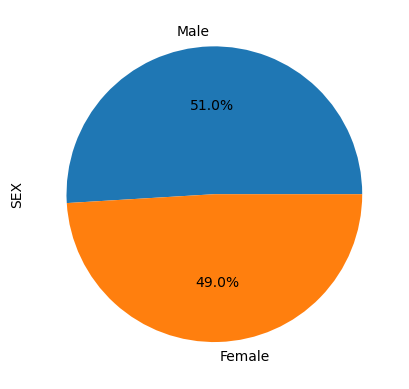

In [89]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart
gender_counts = clean_study_data.Sex.value_counts()
plt.pie(gender_counts.values, labels=gender_counts.index.values, autopct="%1.1f%%")
plt.ylabel("SEX")
plt.show

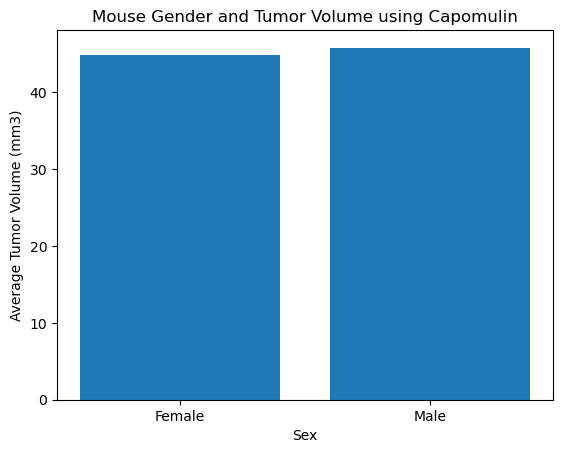

## Quartiles, Outliers and Boxplots

In [96]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max_tumor = clean_study_data.groupby(["Mouse ID"])["Timepoint"].max()
max_tumor = max_tumor.reset_index()
max_tumor
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_merged_data = max_tumor.merge(clean_study_data, on=["Mouse ID", "Timepoint"], how="left")

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0       a203         45           67.973419                 2    Infubinol   
1       a251         45           65.525743                 1    Infubinol   
2       a262         45           70.717621                 4      Placebo   
3       a275         45           62.999356                 3     Ceftamin   
4       a366         30           63.440686                 1     Stelasyn   
..       ...        ...                 ...               ...          ...   
243     z435         10           48.710661                 0     Propriva   
244     z578         45           30.638696                 0     Ramicane   
245     z581         45           62.754451                 3    Infubinol   
246     z795         45           65.741070                 3     Naftisol   
247     z969         45           73.867845                 4     Naftisol   

        Sex  Age_months  Weight (g)  
0    Female          20          23  
1    Female          21          25  
2    Female          17          29  
3    Female          20          28  
4    Female          16          29  
..      ...         ...         ...  
243  Female          12          26  
244    Male          11          16  
245  Female          24          25  
246  Female          13          29  
247    Male           9          30  

[248 rows x 8 columns]

In [108]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list =["Capomulin", "Ramicane", "Infubinol", "Ceftamin" ]

# Create empty list to fill with tumor vol data (for plotting)
tumor_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatment_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = tumor_merged_data.loc[tumor_merged_data["Drug Regimen"] == drug, "Tumor Volume (mm3)"]

    # add subset
    tumor_list.append(tumor_volume)

    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    quartile_range = upperq - lowerq
    lower_bound = lowerq -(1.5* quartile_range)
    upper_bound = upperq +(1.5*quartile_range)

    outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    print(f"{drug}'s potential outliers {outliers}")

Capomulin's potential outliers Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers Series([], Name: Tumor Volume (mm3), dtype: float64)


<function matplotlib.pyplot.show(close=None, block=None)>

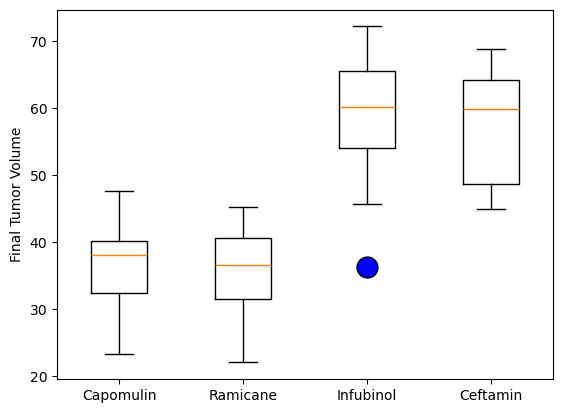

In [163]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
orange = dict(markerfacecolor = "blue", markersize=15)
drug_comparison = plt.boxplot(tumor_list, labels = treatment_list, flierprops=orange)
plt.ylabel("Final Tumor Volume")
plt.show

## Line and Scatter Plots

Text(0.5, 1.0, 'Mouse s185 Tumor Volume over time treated with Capomulin')

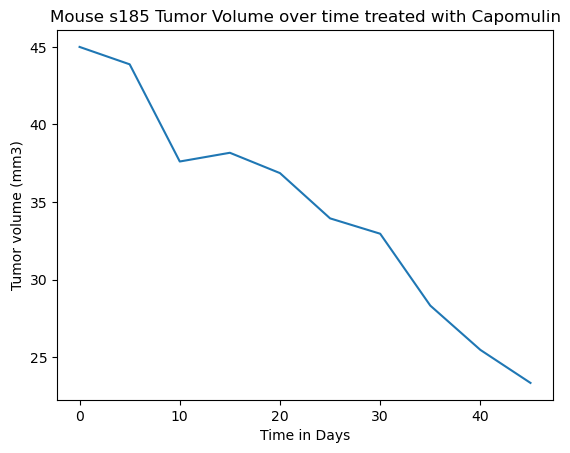

In [121]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin = clean_study_data[clean_study_data["Drug Regimen"] == "Capomulin"]
#display data to pick a mouse
capomulin
#mousepicked
mouse = capomulin[capomulin["Mouse ID"] == "s185"]
#plot
plt.plot(captable["Timepoint"], mouse["Tumor Volume (mm3)"])
plt.xlabel("Time in Days")
plt.ylabel("Tumor volume (mm3)")
plt.title("Mouse s185 Tumor Volume over time treated with Capomulin")

Text(0.5, 1.0, 'Weight Effect on Tumor Volume using Capomulin')

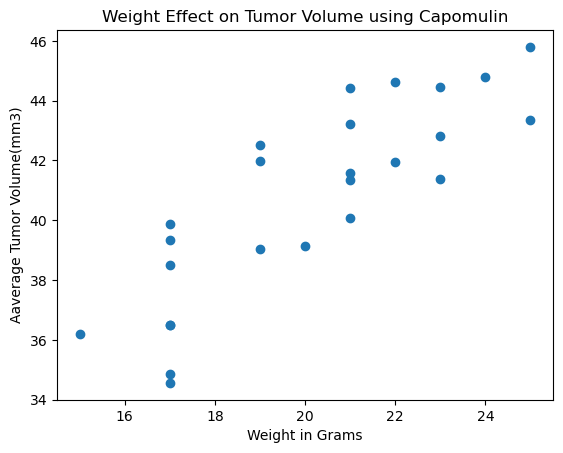

In [149]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
captable = clean_study_data[clean_study_data["Drug Regimen"] == "Capomulin"]

#clean_study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
capavg = captable.groupby("Mouse ID").mean(numeric_only=True)
capavg
plt.scatter(capavg["Weight (g)"], capavg["Tumor Volume (mm3)"])
plt.xlabel("Weight in Grams")
plt.ylabel("Aaverage Tumor Volume(mm3)")
plt.title("Weight Effect on Tumor Volume using Capomulin")

## Correlation and Regression

The correlation between Mouse Weight and Tumor Volume is 0.84
LinregressResult(slope=0.9544396890241049, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)


<function matplotlib.pyplot.show(close=None, block=None)>

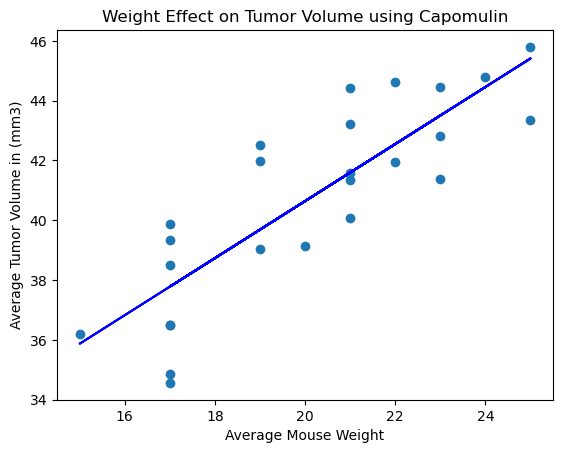

In [162]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(capavg["Weight (g)"], capavg["Tumor Volume (mm3)"])
print(f"The correlation between Mouse Weight and Tumor Volume is {round(correlation[0],2)}")

model = st.linregress(capavg["Weight (g)"], capavg["Tumor Volume (mm3)"])
#print out model so we can see the results
print(model)
#using model results label variables
slope = model[0]
b = model[1]
#y=mx+b
y_value = capavg["Weight (g)"] * slope + b
plt.scatter(capavg["Weight (g)"], capavg["Tumor Volume (mm3)"])
plt.plot(capavg["Weight (g)"], y_value, color = "blue")
plt.xlabel("Average Mouse Weight")
plt.ylabel("Average Tumor Volume in (mm3)")
plt.title("Weight Effect on Tumor Volume using Capomulin")

plt.show


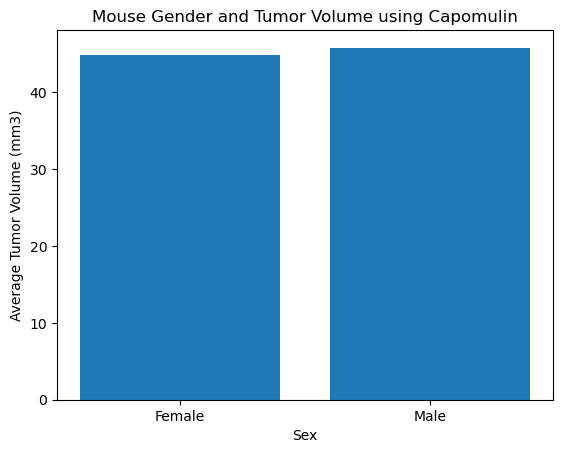

In [169]:
#I wanted to see if there was a difference between gender and tumor size. 
# Filter the data to include only the Capomulin regimen
captable = clean_study_data[clean_study_data["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume for each mouse, keeping only numeric columns
capavg = captable.groupby("Mouse ID").mean(numeric_only=True).reset_index()

# Merge the average tumor volumes with the corresponding mouse sex information
capavg = pd.merge(capavg, captable[["Mouse ID", "Sex"]].drop_duplicates(), on="Mouse ID")

# Generate a scatter plot of mouse sex vs. average tumor volume
plt.bar(capavg["Sex"], capavg["Tumor Volume (mm3)"])
plt.xlabel("Sex")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Gender and Tumor Volume using Capomulin")
plt.show()